In [1]:
from PIL import Image, ImageOps
from skimage import io
import cv2
import numpy as np
import re
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_data/20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls19")
working_dir = os.getcwd()
working_dir

'D:\\user\\Desktop\\(Karl) Lab_rotation\\Malaria_data\\20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls19'

In [5]:
#split tiff files
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_data/ground_truth/C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13")
im = Image.open("C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13.tif")

for i in range(1, 28):
    try:
        im.seek(i)
        im.save("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13_frame%s.tif" % i)
    except EOFError:
        break

In [17]:
im_array = np.array(im)
im_array.shape

(1798, 1398)

In [37]:
im2 = io.imread("20190704_CsGFP_whirls.mvd2 - 20190704_CsGFP_d17_whirls 14 - C=0.tif")
im2.shape

(50, 1798, 1398)

In [27]:
im2

array([[[144, 149, 140, ..., 124, 125, 122],
        [133, 131, 150, ..., 106, 114, 125],
        [131, 123, 133, ..., 128, 122, 124],
        ...,
        [150, 113, 105, ..., 233, 258, 205],
        [120, 125, 130, ..., 189, 224, 244],
        [117, 129, 114, ..., 247, 217, 240]],

       [[120, 133, 124, ..., 113, 123, 107],
        [129, 139, 136, ..., 123, 118, 114],
        [129, 113, 142, ..., 117, 118, 126],
        ...,
        [112, 109, 107, ..., 215, 226, 226],
        [131, 116, 127, ..., 199, 189, 247],
        [122, 125, 112, ..., 198, 216, 212]],

       [[116, 134, 131, ..., 118, 136, 137],
        [142, 142, 111, ..., 119, 117, 135],
        [158, 133, 142, ..., 124, 140, 122],
        ...,
        [103, 116, 117, ..., 238, 231, 226],
        [120, 116, 112, ..., 211, 192, 222],
        [122, 128, 121, ..., 193, 216, 198]],

       ...,

       [[126, 116, 124, ..., 116, 110, 103],
        [107, 115, 115, ..., 108,  98, 121],
        [117, 120, 116, ..., 112, 106, 119

In [38]:
#rename files
all_masks = os.listdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/masks")
for i in all_masks:
    for p in range(5, 28):
        if i == "C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls13_frame" + str(p) + "_mask_2.tif":
            os.rename("C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls13_frame" + str(p) + "_mask_2.tif",
                      "C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13_frame" + str(p) + "_mask_2.tif")

In [41]:
#move files
for i in all_masks:
    for p in range(1, 28):
        if i == "C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13_frame" + str(p) + "_mask_2.tif":
            os.rename("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/masks/C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 14_frame" + str(p) + "_mask_2.tif",
                     "D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/masks2/C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 14_frame" + str(p) + "_mask_2.tif")

In [25]:
#merge two images
masks = os.listdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/masks")
masks2 = os.listdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/masks2")
masks.sort(key=lambda var: [int(x) if x.isdigit() else x
                                 for x in re.findall(r"[^0-9]|[0-9]+", var)])
masks2.sort(key=lambda var: [int(x) if x.isdigit() else x
                                 for x in re.findall(r"[^0-9]|[0-9]+", var)])

for i in range(len(masks)):
    first_image = cv2.imread("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/masks/" + masks[i])
    second_image = cv2.imread("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/masks2/" + masks2[i])
    blended_img = cv2.add(first_image, second_image)
    cv2.imwrite("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/blended_masks/" + masks[i], blended_img)

In [28]:
masks = os.listdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/blended_masks")
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/blended_masks")
for i in masks:
    for p in range(1, 28):
        if i == "C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13_frame" + str(p) + "_mask_1.tif":
            os.rename("C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13_frame" + str(p) + "_mask_1.tif",
                     "C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13_frame" + str(p) + "_mask.tif")
        if i == "C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 14_frame" + str(p) + "_mask_1.tif":
            os.rename("C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 14_frame" + str(p) + "_mask_1.tif",
                     "C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 14_frame" + str(p) + "_mask.tif")

In [3]:
#pad images with zeros
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/original_data/train_masks")
im = Image.open("C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13_frame1_mask.tif")
old_size = im.size
new_size = (1398, 1798)

if old_size[0] % 2 == 0:
    add_left = add_right = (new_size[0] - old_size[0]) // 2
else:
    add_left = (new_size[0] - old_size[0]) // 2
    add_right = (new_size[0] - old_size[0]) // 2 + 1
    
if old_size[1] % 2 == 0:
    add_top = add_bottom = (new_size[1] - old_size[1]) // 2
else:
    add_top = (new_size[1] - old_size[1]) // 2
    add_bottom = (new_size[1] - old_size[1]) // 2 + 1

im_with_border = ImageOps.expand(im, border=(add_left, add_top, add_right, add_bottom))
im_with_border.save("bordered_C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13_frame1_mask.tif")

In [7]:
val_masks = os.listdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/original_data/val_masks")
for i in val_masks:
    im = Image.open("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/original_data/val_masks/" + i)
    old_size = im.size
    new_size = (1398, 1798)

    if old_size[0] % 2 == 0:
        add_left = add_right = (new_size[0] - old_size[0]) // 2
    else:
        add_left = (new_size[0] - old_size[0]) // 2
        add_right = (new_size[0] - old_size[0]) // 2 + 1
    if old_size[1] % 2 == 0:
        add_top = add_bottom = (new_size[1] - old_size[1]) // 2
    else:
        add_top = (new_size[1] - old_size[1]) // 2
        add_bottom = (new_size[1] - old_size[1]) // 2 + 1

    im_with_border = ImageOps.expand(im, border=(add_left, add_top, add_right, add_bottom))
    im_with_border.save("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/val_masks/val/bordered_" + i)

In [8]:
import cv2
import os
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/train_frames/train")
os.getcwd()
im = cv2.imread("bordered_C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13_frame6.tif")
im.shape

(1798, 1398, 3)

In [9]:
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_Keras_model/data/train_masks/train")
im2 = cv2.imread("bordered_C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 13_frame6_mask.tif")
im2.shape

(1798, 1398, 3)

In [3]:
#crop images to similar size of masks
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/test_frames")
for i in os.listdir():
    im = cv2.imread(i, -1)
    cropped_im = im[538:1417, 273:1122]
    cv2.imwrite("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/cropped_whirl4_test_frames/cropped_" + i, cropped_im)

In [2]:
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/test_frames")
for i in os.listdir():
    if re.search(r"whirls 13", i) != None:
        im = cv2.imread(i, -1)
        cropped_im = im[:, 18:]
        cv2.imwrite("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/cropped_" + i, cropped_im)

In [4]:
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/test_masks")
for i in os.listdir():
    if re.search(r"whirls 13", i) != None:
        im = cv2.imread(i)
        cropped_im = im[:594, :594]
        cv2.imwrite("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/cropped_" + i, cropped_im)

In [7]:
#border whirls 14 to square images
os.chdir("D:/user/Desktop/frames")
for i in os.listdir():
    if re.search(r"whirls 14", i) != None:
        im = cv2.imread(i, -1)
        bordered_im = cv2.copyMakeBorder(im, 0, 0, 15, 15, cv2.BORDER_CONSTANT, value=0)
        cv2.imwrite("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/" + i, bordered_im)

In [6]:
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/test_masks")
for i in os.listdir():
    if re.search(r"whirls 14", i) != None:
        im = cv2.imread(i)
        bordered_im = cv2.copyMakeBorder(im, 0, 0, 15, 15, cv2.BORDER_CONSTANT, value=0)
        cv2.imwrite("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/bordered_" + i, bordered_im)

In [13]:
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/Unet/training_results/my_own_generator(with cropped 13 and bordered 14)/visualization")

with open("full_training_results_data_augmentation.txt", "r") as f:
    with open("full_training_results_data_augmentation2.txt", "w") as fh:
        loss = []
        acc = []
        val_loss = []
        val_acc = []
        for line in f.readlines():
            if line.startswith("10/10") or line.startswith("5/5"):
                line = line.split(" - ")
                loss.append(line[2])
                acc.append(line[3])
                val_loss.append(line[4])
                val_acc.append(line[5])
            
        for i in range(len(loss)):
            l = re.findall(r"\d.\d*", loss[i])[0]
            loss[i] = l
            a = re.findall(r"\d.\d*", acc[i])[0]
            acc[i] = a
            vl = re.findall(r"\d.\d*", val_loss[i])[0]
            val_loss[i] = vl
            va = re.findall(r"\d.\d*", val_acc[i])[0]
            val_acc[i] = va
        
        for i in range(len(loss)):
            print(loss[i] + "-" + acc[i] + "-" + val_loss[i] + "-" + val_acc[i], file=fh)

In [47]:
n = 40
idx = np.arange(n)

np.random.seed(123)
np.random.shuffle(idx)

idx

array([ 6, 10, 12, 38,  5, 11, 23,  1, 13, 20,  8, 37, 24,  7, 18, 39,  3,
       31, 21, 16, 25,  4, 26, 35, 29, 27, 14,  0,  9, 15, 30, 36, 32, 33,
       22, 19, 17, 34, 28,  2])

In [ ]:
with open("malaria_dataset.txt", "w") as fh:
    print("train_images", end=":", file=fh)
    for i in train_images:
        print(i, end=":", file=fh)
    print("\n", file=fh)
    print("val_images", end=":", file=fh)
    for j in val_images:
        print(j, end=":", file=fh)
    print("\n", file=fh)
    print("train_masks", end=":", file=fh)
    for k in train_masks:
        print(k, end=":", file=fh)
    print("\n", file=fh)
    print("val_masks", end=":", file=fh)
    for l in val_masks:
        print(l, end=":", file=fh)

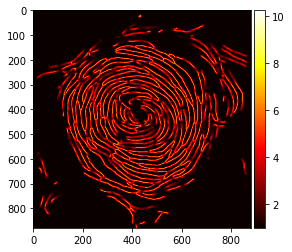

In [14]:
os.chdir("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/Unet")
from unet_weight_map import UnetWeightMap

ma = cv2.imread("D:/user/Desktop/(Karl) Lab_rotation/Malaria_segmentation_model/data/train_masks/train/bordered_C1-20190704_CsGFP_whirls.mvd2-20190704_CsGFP_d17_whirls 14_frame1_mask.tif")
ma = cv2.cvtColor(ma, cv2.COLOR_BGR2GRAY)
ma = cv2.resize(ma, (608, 608), interpolation=cv2.INTER_NEAREST)

weight_map = UnetWeightMap(ma)

fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

im = ax.imshow(weight_map, cmap="hot")

fig.colorbar(im, cax=cax, orientation="vertical")
plt.show()